# Veteran Suicide Prevention Scratchpad

## Standard Library Imports

In [1]:
# for data manipulation 
import pandas as pd
import numpy as np

# for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data

- originally, an xl spreadsheet

- converted over to GoogleSheet 

In [2]:
import re # just in case I need to clean up the data with regex after it comes in
    
# Original Link:
# https://docs.google.com/spreadsheets/d/1xiVtqcMEK50ipQpfgFs7iMqxspAFAVRZvxwItnoacFo/edit?usp=sharing

sheet_id = "1xiVtqcMEK50ipQpfgFs7iMqxspAFAVRZvxwItnoacFo"

va_df= pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")

pd.set_option("display.max_columns", None)

va_df

,Name,Type,Length,Description,Rand Type,SAS Rand Function
0,Alprazolam12,Numeric,8,Alprazolam tx in prior 12 months,Binomial,"Alprazolam12=rand(""Binomial"",p,n);"
1,Alprazolam24,Numeric,8,Alprazolam tx in prior 24 months,Binomial,"Alprazolam24=rand(""Binomial"",p,n);"
2,als12,Numeric,8,ALS dx in prior 12 months,Binomial,"als12=rand(""Binomial"",p,n);"
3,als24,Numeric,8,ALS dx in prior 24 months,Binomial,"als24=rand(""Binomial"",p,n);"
4,ami12,Numeric,8,Acute myocardial infarction in prior 12 months,Binomial,"ami12=rand(""Binomial"",p,n);"
...,...,...,...,...,...,...
466,UCvisits_prior3,Numeric,8,Number Urgent Care visits in past 3 months,Normal,"UCvisits_prior3=rand(""Normal"",mean,std);"
467,UCvisits_prior6,Numeric,8,Number Urgent Care visits in past 6 months,Normal,"UCvisits_prior6=rand(""Normal"",mean,std);"
468,weight_pm,Numeric,8,Weight (person-months),Normal,"weight_pm=rand(""Normal"",mean,std);"
469,white,Numeric,8,"Race: white, non-white or unknown",Normal,"white=rand(""Normal"",mean,std);"


**^^Data as is on import.  No corrections, cleaning, or adjustments made.**

## Dictionary of Terms / Data Dictionary

- In order to help understand the dataset better

### Column Data:

**Name** - 

**Type** - 

**Length** - 

**Description** - 

**Rand Type** - 

**SAS Rand Function** - 

### Row Data:

**Alprazolam** -

**Numeric** - 

**ALS (als)** - 

**Binomial** - 

**p** - 

**n** - 

**ami** - 

**UCvisits_Prior** - 

**weight_pm** - 

**white** - 

**YearsSinceFirstUse** - 



In [3]:
va_df.columns

Index(['Name', 'Type', 'Length', 'Description', 'Rand Type',
       'SAS Rand Function'],
      dtype='object')

In [4]:
va_df["Name"].nunique()

471

In [5]:
va_df["Type"].nunique()

1

In [6]:
va_df["Length"].nunique()

1

In [7]:
va_df["Description"].nunique()

470

In [8]:
va_df["Rand Type"].nunique()

2

In [9]:
va_df["SAS Rand Function"].nunique()

470

### Since there is only one unique value in "Type" and "Length" columns, I'm dropping them as they add little to the data

In [10]:
va_df = va_df.drop(columns=["Type", "Length"])

va_df

,Name,Description,Rand Type,SAS Rand Function
0,Alprazolam12,Alprazolam tx in prior 12 months,Binomial,"Alprazolam12=rand(""Binomial"",p,n);"
1,Alprazolam24,Alprazolam tx in prior 24 months,Binomial,"Alprazolam24=rand(""Binomial"",p,n);"
2,als12,ALS dx in prior 12 months,Binomial,"als12=rand(""Binomial"",p,n);"
3,als24,ALS dx in prior 24 months,Binomial,"als24=rand(""Binomial"",p,n);"
4,ami12,Acute myocardial infarction in prior 12 months,Binomial,"ami12=rand(""Binomial"",p,n);"
...,...,...,...,...
466,UCvisits_prior3,Number Urgent Care visits in past 3 months,Normal,"UCvisits_prior3=rand(""Normal"",mean,std);"
467,UCvisits_prior6,Number Urgent Care visits in past 6 months,Normal,"UCvisits_prior6=rand(""Normal"",mean,std);"
468,weight_pm,Weight (person-months),Normal,"weight_pm=rand(""Normal"",mean,std);"
469,white,"Race: white, non-white or unknown",Normal,"white=rand(""Normal"",mean,std);"


### VIMP: After several hours of trying to track down further information for the data in the columns, I was unable to find it.  For instance, there is no further description for "Name" other than "string;" similar for the other columns.  As of now, the Department of Veterans Affairs (the owner of the data) has not responded to clarification queries and has since taken this dataset offline.

In [11]:
# Original Link:
# https://docs.google.com/spreadsheets/d/18QZWC80YlnF8eMYUugbdtrnzif9fuANos8XZJ_2j27w/edit?usp=sharing

sheet1_id = "18QZWC80YlnF8eMYUugbdtrnzif9fuANos8XZJ_2j27w"

age_adjusted_df= pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet1_id}/export?format=csv", sep=None, thousands=",", engine="python")

pd.set_option("display.max_columns", None)

age_adjusted_df

,2005-2017 National Suicide Data Appendix,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"All Veteran Deaths by Suicide, Crude and Age A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-2017 National Suicide Data Appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year\n of\n Death,Veteran\n Suicide\n Deaths,Veteran\n Population\n Estimate,"Veteran\n Crude\n Rate\n per\n 100,000","Veteran\n Age\n Adjusted\n Rate per\n 100,000",Male\n Veteran\n Suicide\n Deaths,Male\n Veteran\n Population\n Estimate,"Male\n Veteran\n Crude\n Rate\n per\n 100,000",Male\n Veteran\n Age\n Adjusted\n Rate per\n 1...,Female\n Veteran\n Suicide\n Deaths,Female\n Veteran\n Population\n Estimate,"Female\n Veteran\n Crude\n Rate\n per\n 100,000",Female\n Veteran\n Age\n Adjusted\n Rate per\n...
4,2005,5787,24240000,23.9,25.5,5610,22501000,24.9,27.3,177,1739000,10.2,10.4
5,2006,5688,23731000,24,24.8,5527,21992000,25.1,26.8,161,1739000,9.3,9.2
6,2007,5893,23291000,25.3,26.5,5724,21588000,26.5,28.7,169,1703000,9.9,9.7
7,2008,6216,22996000,27,28.4,6024,21322000,28.3,30.8,192,1674000,11.5,11.3
8,2009,6172,22603000,27.3,28.3,5968,20917000,28.5,30.4,204,1686000,12.1,12.2
9,2010,6158,22411000,27.5,28.9,5943,20697000,28.7,31.3,215,1714000,12.5,12.3


In [12]:
# Renaming columns:
age_adjusted_df = age_adjusted_df.rename(
            columns={
                "2005-2017 National Suicide Data Appendix": "year_of_death",
                "Unnamed: 1": "veteran_suicide_deaths",
                "Unnamed: 2": "veteran_population_estimate",
                "Unnamed: 3": "veteran_crude_rate_per_100K",
                "Unnamed: 4": "veteran_age_adjusted_rate_per_100K",
                "Unnamed: 5": "male_veteran_suicide_deaths",
                "Unnamed: 6": "male_veteran_population_estimate",
                "Unnamed: 7": "male_veteran_crude_rate_per_100K",
                "Unnamed: 8": "male_veteran_age_adjusted_rate_per_100K",
                "Unnamed: 9": "female_veteran_suicide_deaths",
                "Unnamed: 10": "female_veteran_population_estimate",
                "Unnamed: 11": "female_veteran_crude_rate_per_100K", 
                "Unnamed: 12": "female_veteran_age_adjusted_rate_per_100K",
            },
        )


age_adjusted_df.head()

,year_of_death,veteran_suicide_deaths,veteran_population_estimate,veteran_crude_rate_per_100K,veteran_age_adjusted_rate_per_100K,male_veteran_suicide_deaths,male_veteran_population_estimate,male_veteran_crude_rate_per_100K,male_veteran_age_adjusted_rate_per_100K,female_veteran_suicide_deaths,female_veteran_population_estimate,female_veteran_crude_rate_per_100K,female_veteran_age_adjusted_rate_per_100K
0,"All Veteran Deaths by Suicide, Crude and Age A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-2017 National Suicide Data Appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year\n of\n Death,Veteran\n Suicide\n Deaths,Veteran\n Population\n Estimate,"Veteran\n Crude\n Rate\n per\n 100,000","Veteran\n Age\n Adjusted\n Rate per\n 100,000",Male\n Veteran\n Suicide\n Deaths,Male\n Veteran\n Population\n Estimate,"Male\n Veteran\n Crude\n Rate\n per\n 100,000",Male\n Veteran\n Age\n Adjusted\n Rate per\n 1...,Female\n Veteran\n Suicide\n Deaths,Female\n Veteran\n Population\n Estimate,"Female\n Veteran\n Crude\n Rate\n per\n 100,000",Female\n Veteran\n Age\n Adjusted\n Rate per\n...
4,2005,5787,24240000,23.9,25.5,5610,22501000,24.9,27.3,177,1739000,10.2,10.4


**^^Dropping rows 0, 1, 2, and 3 because they provide no information other than column names.**

In [13]:
age_adjusted_df = age_adjusted_df.drop([0, 1, 2, 3])

age_adjusted_df

,year_of_death,veteran_suicide_deaths,veteran_population_estimate,veteran_crude_rate_per_100K,veteran_age_adjusted_rate_per_100K,male_veteran_suicide_deaths,male_veteran_population_estimate,male_veteran_crude_rate_per_100K,male_veteran_age_adjusted_rate_per_100K,female_veteran_suicide_deaths,female_veteran_population_estimate,female_veteran_crude_rate_per_100K,female_veteran_age_adjusted_rate_per_100K
4,2005,5787,24240000,23.9,25.5,5610,22501000,24.9,27.3,177,1739000,10.2,10.4
5,2006,5688,23731000,24,24.8,5527,21992000,25.1,26.8,161,1739000,9.3,9.2
6,2007,5893,23291000,25.3,26.5,5724,21588000,26.5,28.7,169,1703000,9.9,9.7
7,2008,6216,22996000,27,28.4,6024,21322000,28.3,30.8,192,1674000,11.5,11.3
8,2009,6172,22603000,27.3,28.3,5968,20917000,28.5,30.4,204,1686000,12.1,12.2
9,2010,6158,22411000,27.5,28.9,5943,20697000,28.7,31.3,215,1714000,12.5,12.3
10,2011,6116,22061000,27.7,29.8,5889,20326000,29,32.3,227,1735000,13.1,12.9
11,2012,6065,21765000,27.9,30.3,5846,20017000,29.2,33.1,219,1748000,12.5,12.3
12,2013,6132,21415000,28.6,31.7,5901,19640000,30,34.7,231,1775000,13,13
13,2014,6272,21029000,29.8,32.6,5998,19234000,31.2,35.4,274,1795000,15.3,15.2


### Data Dictionary To Better Interpret the Columns:

**veteran_suicide_deaths** - total number of veteran suicides for that year. 

**veteran_population_estimate** - An estimated number of the *total* veteran population, based on adding the numbers found in the 'male_veteran_population_estimate' and 'female_veteran_poplulation_estimate' columns.

**veteran_crude_rate_per_100K** - This is the number of new suicides reported per 100,000 in the veteran community.  The (apparent) formula for achieving this crude rate is = (# of deaths / total # veterans) * 1,000.  It is considered to be a good measure of the overall veteran suicide rate.  Definition applies to both 'male_veteran_crude_rate' and 'female_veteran_crude_rate.'

**veteran_age_adjusted_rate_per_100K** - A direct method of age-adjusted death rates per 100,000 veterans, males, and females; the death rate that the study population (veterans) would have IF it had the same age distribution as the standard population (non-veterans) - *description courtesy of [North Carolina Public Health](https://schs.dph.ncdhhs.gov/schs/pdf/primer13_2.pdf).*

### More Datasets:

The new dataset was from an XL spreadsheet with several tabs, each of which is copied over to a Google Sheets doc.  Seeing as how I was having trouble importing the entire body of the doc (ie, each individual sheet of data), I went to Google to request permission to work with their API.  Doing so gave me the json file, saved to my working directory. 

Also, to utilize the Google Sheet API within the Jupyter framework, since Python is my programming language of choice, I pip installed gspread, the Python API for Google Sheets. 

**NB: The four cells below have been commented out because they yielded the same results as the simple read-in from Google Sheets.  It was an attempt to incorporate a new library (gspread); the fifth cell in markdown explains what happend after the attempt was made.**

In [14]:
# import gspread 
# from oauth2client.service_account import ServiceAccountCredentials

In [15]:
# scope = ['https://spreadsheets.google.com/feeds'] 
# credentials = ServiceAccountCredentials.from_json_keyfile_name('./SoldierSuicidePrevention-460f82b39b74.json', scope) 
# gc = gspread.authorize(credentials)

In [16]:
# #https://docs.google.com/spreadsheets/d/18QZWC80YlnF8eMYUugbdtrnzif9fuANos8XZJ_2j27w/edit?usp=sharing

# spreadsheet_key = '18QZWC80YlnF8eMYUugbdtrnzif9fuANos8XZJ_2j27w' 
# book = gc.open_by_key(spreadsheet_key) 
# worksheet = book.worksheet("AgeGroup") 
# table = worksheet.get_all_values()

# print(table)

In [17]:
# ##Convert table data into a dataframe 
# df2 = pd.DataFrame(table[1:], columns=table[0]) 
# ##Only keep columns we need 
# df2 = df2[['YearofDeath', 'AgeGroup', 'VeteranSuicideDeaths', 'VeteranPopulationEstimate', 'VeteranCrudeRate per 100,000', 'Male Veteran Suicide Deaths', 'Male Veteran Population Estimate', 'Male Veteran Crude Rate per 100,000', 'Age Group 2', 'Female Veteran Suicide Deaths', 'Female Veteran Population Estimate', 'Female Veteran Crude Rate per 100,000']] 
# ##Convert number strings to floats and ints 
# df2 = df2.apply(pd.to_numeric, errors='ignore') 
# ##Convert date strings to datetime format 
# # df2['End Date'] = pd.to_datetime(df2['End Date'],infer_datetime_format=True) 
# # df2['Start Date'] = pd.to_datetime(df2['Start Date'],infer_datetime_format=True) 
# df2.head()

**^^We have a problem here.  It seems that even when interacting with the Google Sheet API, calling that spreadsheet key still only gives me the first worksheet of the file, which I've already cleaned and prepped for analysis.**

In [18]:
age_adjusted_df.head() # make sure the dataframe hasn't changed after messing around with the import with gspread

,year_of_death,veteran_suicide_deaths,veteran_population_estimate,veteran_crude_rate_per_100K,veteran_age_adjusted_rate_per_100K,male_veteran_suicide_deaths,male_veteran_population_estimate,male_veteran_crude_rate_per_100K,male_veteran_age_adjusted_rate_per_100K,female_veteran_suicide_deaths,female_veteran_population_estimate,female_veteran_crude_rate_per_100K,female_veteran_age_adjusted_rate_per_100K
4,2005,5787,24240000,23.9,25.5,5610,22501000,24.9,27.3,177,1739000,10.2,10.4
5,2006,5688,23731000,24,24.8,5527,21992000,25.1,26.8,161,1739000,9.3,9.2
6,2007,5893,23291000,25.3,26.5,5724,21588000,26.5,28.7,169,1703000,9.9,9.7
7,2008,6216,22996000,27,28.4,6024,21322000,28.3,30.8,192,1674000,11.5,11.3
8,2009,6172,22603000,27.3,28.3,5968,20917000,28.5,30.4,204,1686000,12.1,12.2


In [19]:
age_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 16
Data columns (total 13 columns):
year_of_death                                13 non-null object
veteran_suicide_deaths                       13 non-null object
veteran_population_estimate                  13 non-null object
veteran_crude_rate_per_100K                  13 non-null object
veteran_age_adjusted_rate_per_100K           13 non-null object
male_veteran_suicide_deaths                  13 non-null object
male_veteran_population_estimate             13 non-null object
male_veteran_crude_rate_per_100K             13 non-null object
male_veteran_age_adjusted_rate_per_100K      13 non-null object
female_veteran_suicide_deaths                13 non-null object
female_veteran_population_estimate           13 non-null object
female_veteran_crude_rate_per_100K           13 non-null object
female_veteran_age_adjusted_rate_per_100K    13 non-null object
dtypes: object(13)
memory usage: 1.4+ KB


**^Can't really do much with 'object' data types right now, so need to convert the values over to floats.  Code for doing this while using 'year_of_death' as the column we want to change:**

In [20]:
age_adjusted_df['year_of_death'] = age_adjusted_df['year_of_death'].astype('float') 

In [21]:
age_adjusted_df['veteran_suicide_deaths'] = age_adjusted_df['veteran_suicide_deaths'].astype('float')

In [22]:
age_adjusted_df['veteran_population_estimate'] = age_adjusted_df['veteran_population_estimate'].astype('float')

In [23]:
age_adjusted_df['veteran_crude_rate_per_100K'] = age_adjusted_df['veteran_crude_rate_per_100K'].astype('float')

In [24]:
age_adjusted_df['veteran_age_adjusted_rate_per_100K'] = age_adjusted_df['veteran_age_adjusted_rate_per_100K'].astype('float')

In [25]:
age_adjusted_df['male_veteran_suicide_deaths'] = age_adjusted_df['male_veteran_suicide_deaths'].astype('float')

In [26]:
age_adjusted_df['male_veteran_population_estimate'] = age_adjusted_df['male_veteran_population_estimate'].astype('float')

In [27]:
age_adjusted_df['male_veteran_crude_rate_per_100K'] = age_adjusted_df['male_veteran_crude_rate_per_100K'].astype('float')

In [28]:
age_adjusted_df['male_veteran_age_adjusted_rate_per_100K'] = age_adjusted_df['male_veteran_age_adjusted_rate_per_100K'].astype('float')

In [29]:
age_adjusted_df['female_veteran_suicide_deaths'] = age_adjusted_df['female_veteran_suicide_deaths'].astype('float')

In [30]:
age_adjusted_df['female_veteran_population_estimate'] = age_adjusted_df['female_veteran_population_estimate'].astype('float')

In [31]:
age_adjusted_df['female_veteran_crude_rate_per_100K'] = age_adjusted_df['female_veteran_crude_rate_per_100K'].astype('float')

In [32]:
age_adjusted_df['female_veteran_age_adjusted_rate_per_100K'] = age_adjusted_df['female_veteran_age_adjusted_rate_per_100K'].astype('float')

In [33]:
# age_adjusted_df.columns = age_adjusted_df.columns.str.replace(',', '', " ", "")

In [34]:
age_adjusted_df.dtypes

year_of_death                                float64
veteran_suicide_deaths                       float64
veteran_population_estimate                  float64
veteran_crude_rate_per_100K                  float64
veteran_age_adjusted_rate_per_100K           float64
male_veteran_suicide_deaths                  float64
male_veteran_population_estimate             float64
male_veteran_crude_rate_per_100K             float64
male_veteran_age_adjusted_rate_per_100K      float64
female_veteran_suicide_deaths                float64
female_veteran_population_estimate           float64
female_veteran_crude_rate_per_100K           float64
female_veteran_age_adjusted_rate_per_100K    float64
dtype: object

### BOOM.  Done.  Now that everything's a float, we can start doing some analysis.

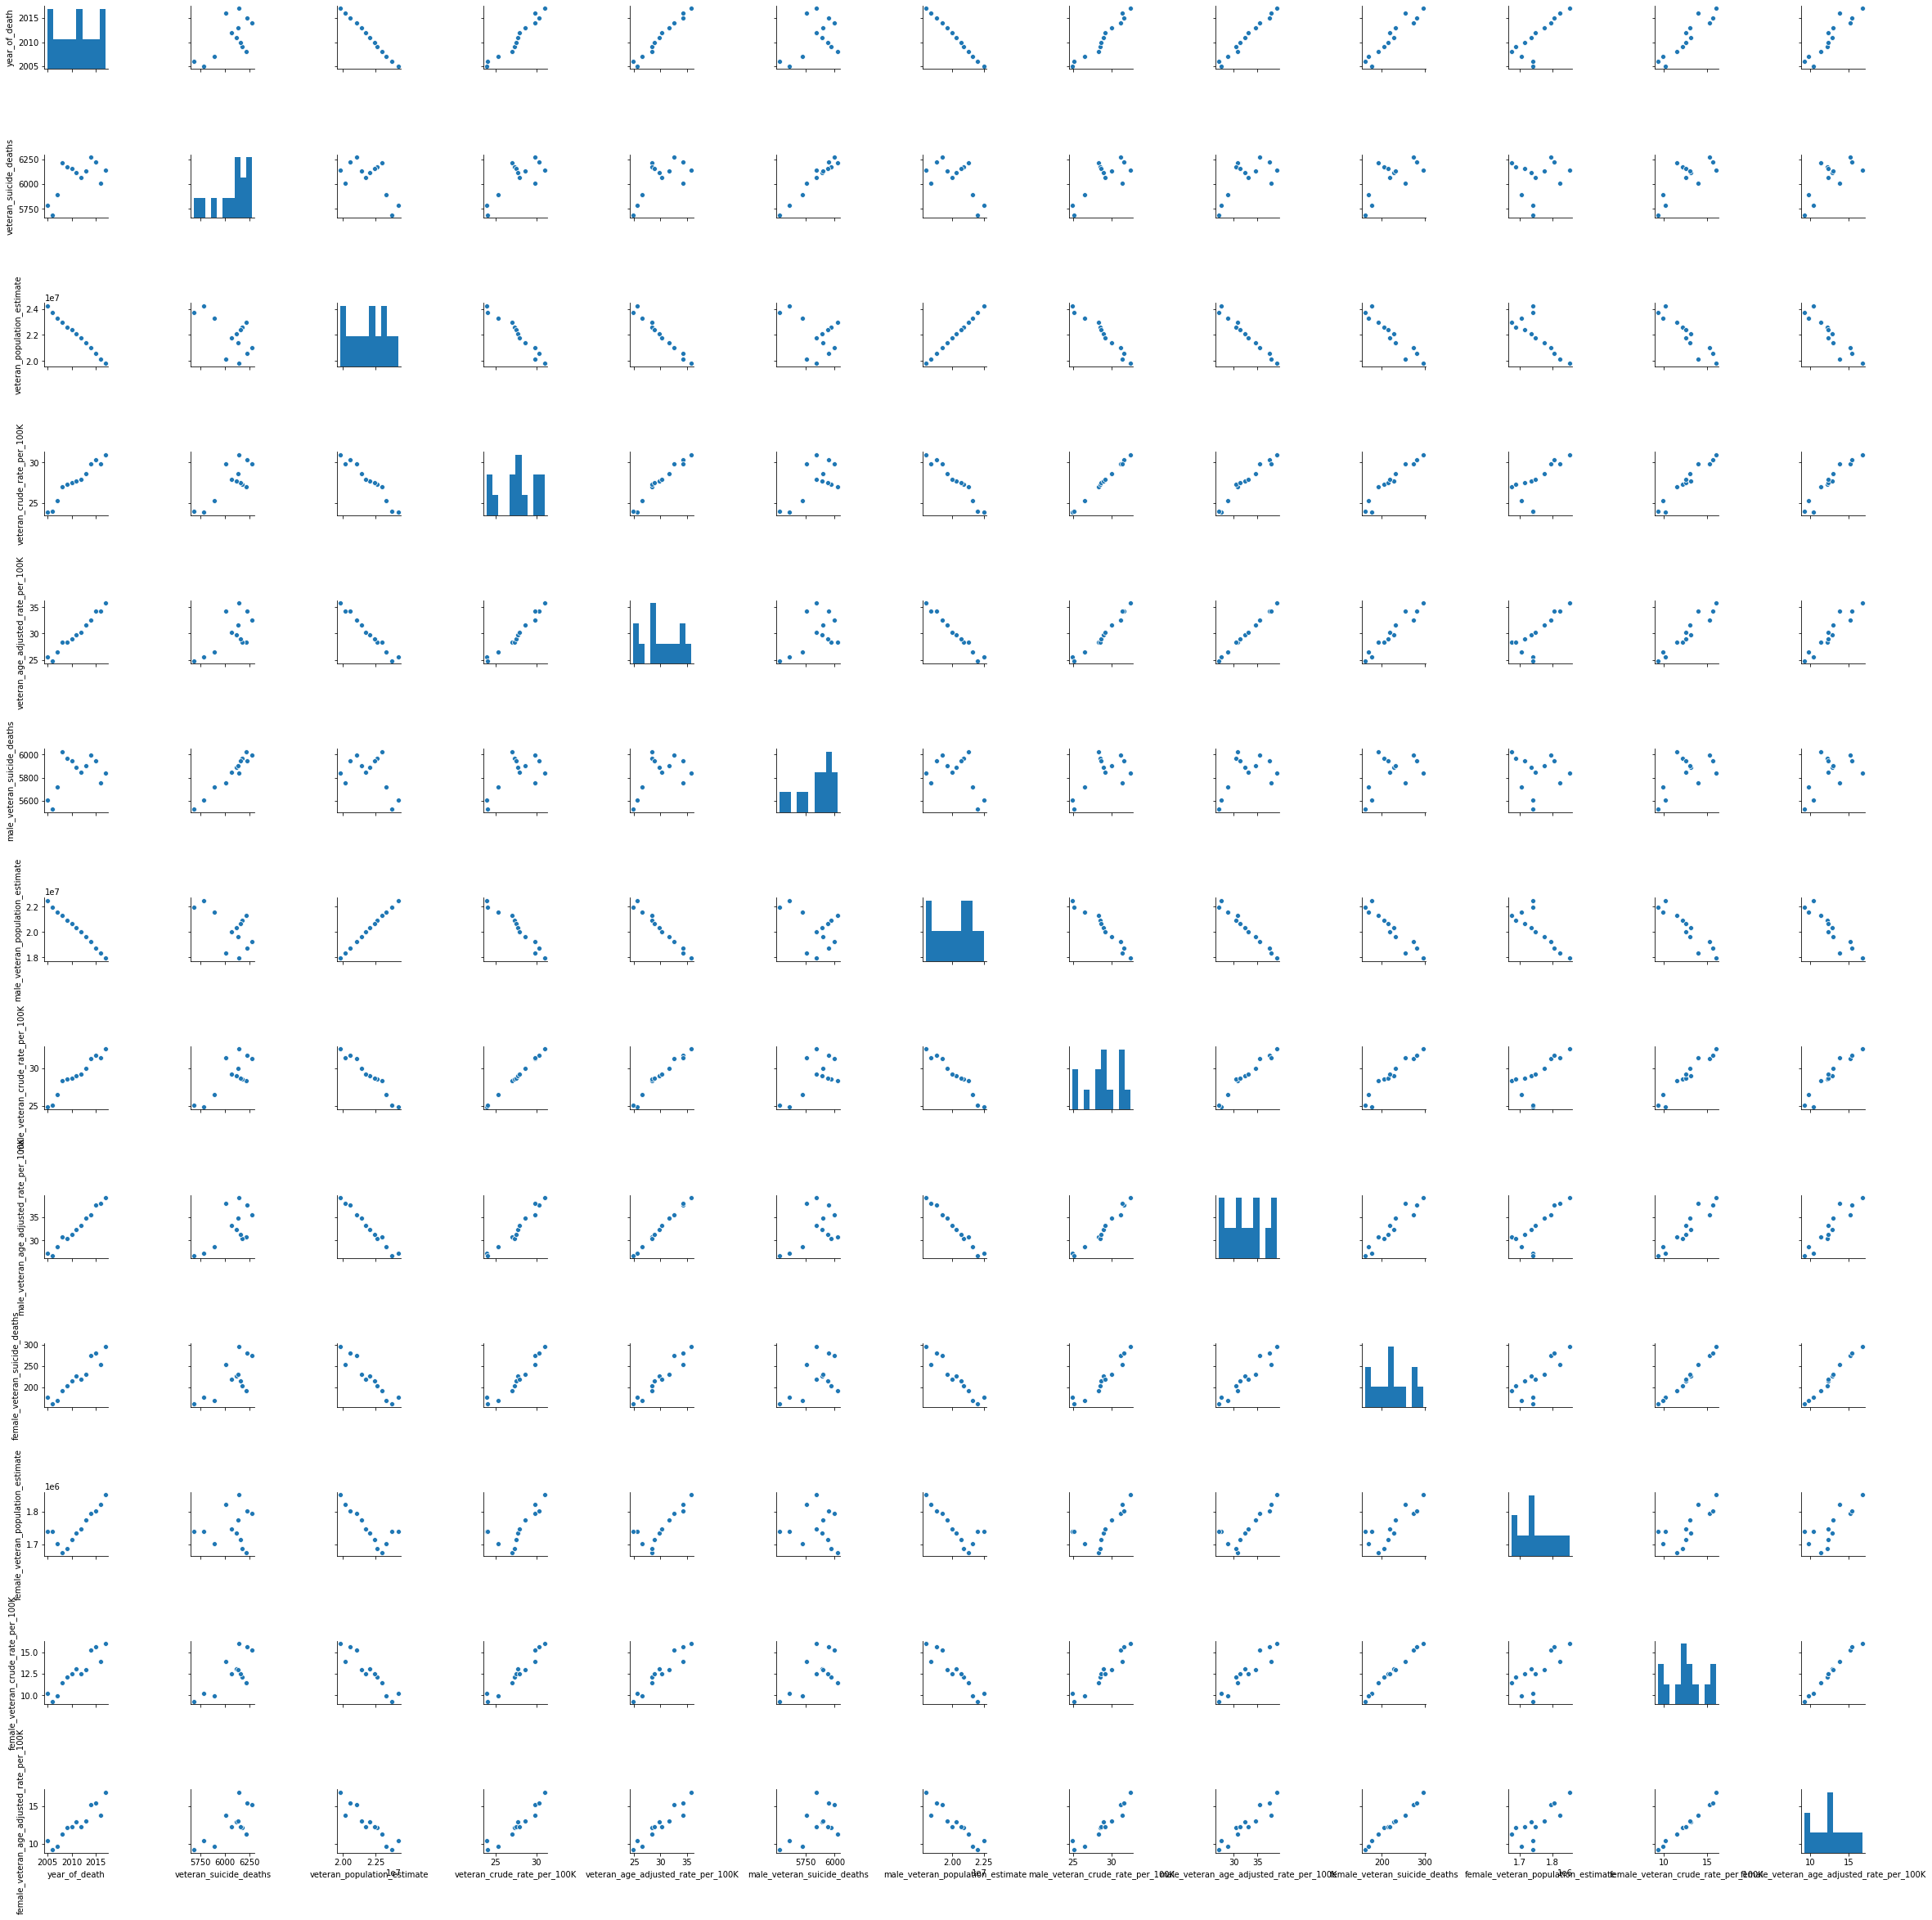

In [35]:
sns.pairplot(age_adjusted_df)

**^^Now will attempt to read the other sheets into their own dataframes using the standard Google Sheet import.**

In [36]:
# Original Link:
# https://docs.google.com/spreadsheets/d/14okhBqlMF8MFoaLy0HM9StT_brUx3kUvSXDvCRqcIxM/edit?usp=sharing

sheet2_id = "14okhBqlMF8MFoaLy0HM9StT_brUx3kUvSXDvCRqcIxM"

age_group_df= pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet2_id}/export?format=csv", sep=None, thousands=",", engine="python")

pd.set_option("display.max_columns", None)

print("This is the AgeGroup DataFrame")

age_group_df


This is the AgeGroup DataFrame


,2005-2017 National Suicide Data Appendix,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"All Veteran Deaths by Suicide, Crude Rates, by...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-2017 National Suicide Data Appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year\n of\n Death,Age\n Group,Veteran\n Suicide\n Deaths,Veteran\n Population\n Estimate,"Veteran\n Crude\n Rate per\n 100,000",Male\n Veteran\n Suicide\n Deaths,Male\n Veteran\n Population\n Estimate,"Male\n Veteran\n Crude\n Rate per\n 100,000",Age\n Group\n 2,Female\n Veteran\n Suicide\n Deaths,Female\n Veteran\n Population\n Estimate
4,2005,18-34,544,2147000,25.3,504,1779000,28.3,18-34,40,368000
...,...,...,...,...,...,...,...,...,...,...,...
64,2017,18-34,864,1940000,44.5,786,1574000,49.9,18-34,78,366000
65,2017,35-54,1708,4863000,35.1,1578,4114000,38.4,35-54,130,749000
66,2017,55-74,2319,8544000,27.1,2237,7941000,28.2,55+,88,737000
67,2017,75+,1242,4456000,27.9,1236,4322000,28.6,.,.,.


In [37]:
# Renaming columns:
age_group_df = age_group_df.rename(
            columns={
                "2005-2017 National Suicide Data Appendix": "year_of_death",
                "Unnamed: 1": "age_group",
                "Unnamed: 2": "veteran_suicide_deaths",
                "Unnamed: 3": "veteran_population_estimate",
                "Unnamed: 4": "veteran_crude_rate_per_100K",
                "Unnamed: 5": "male_veteran_suicide_deaths",
                "Unnamed: 6": "male_veteran_population_estimate",
                "Unnamed: 7": "male_veteran_crude_rate_per_100K",
                "Unnamed: 8": "age_group_2",
                "Unnamed: 9": "female_veteran_suicide_deaths",
                "Unnamed: 10": "female_veteran_population_estimate",
            },
        )


age_group_df.head()

,year_of_death,age_group,veteran_suicide_deaths,veteran_population_estimate,veteran_crude_rate_per_100K,male_veteran_suicide_deaths,male_veteran_population_estimate,male_veteran_crude_rate_per_100K,age_group_2,female_veteran_suicide_deaths,female_veteran_population_estimate
0,"All Veteran Deaths by Suicide, Crude Rates, by...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-2017 National Suicide Data Appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year\n of\n Death,Age\n Group,Veteran\n Suicide\n Deaths,Veteran\n Population\n Estimate,"Veteran\n Crude\n Rate per\n 100,000",Male\n Veteran\n Suicide\n Deaths,Male\n Veteran\n Population\n Estimate,"Male\n Veteran\n Crude\n Rate per\n 100,000",Age\n Group\n 2,Female\n Veteran\n Suicide\n Deaths,Female\n Veteran\n Population\n Estimate
4,2005,18-34,544,2147000,25.3,504,1779000,28.3,18-34,40,368000


**^^Dropping rows 0, 1, 2, and 3 because they provide no information other than column names.**

In [38]:
age_group_df = age_group_df.drop([0, 1, 2, 3])

age_group_df

,year_of_death,age_group,veteran_suicide_deaths,veteran_population_estimate,veteran_crude_rate_per_100K,male_veteran_suicide_deaths,male_veteran_population_estimate,male_veteran_crude_rate_per_100K,age_group_2,female_veteran_suicide_deaths,female_veteran_population_estimate
4,2005,18-34,544,2147000,25.3,504,1779000,28.3,18-34,40,368000
5,2005,35-54,2059,7116000,28.9,1948,6336000,30.7,35-54,111,780000
6,2005,55-74,1866,9976000,18.7,1847,9626000,19.2,55+,26,591000
7,2005,75+,1315,5001000,26.3,1308,4760000,27.5,.,.,.
8,2005,Total,5787,24240000,23.9,5610,22501000,24.9,Total,177,1739000
...,...,...,...,...,...,...,...,...,...,...,...
64,2017,18-34,864,1940000,44.5,786,1574000,49.9,18-34,78,366000
65,2017,35-54,1708,4863000,35.1,1578,4114000,38.4,35-54,130,749000
66,2017,55-74,2319,8544000,27.1,2237,7941000,28.2,55+,88,737000
67,2017,75+,1242,4456000,27.9,1236,4322000,28.6,.,.,.


In [39]:
age_group_df.dtypes

year_of_death                         object
age_group                             object
veteran_suicide_deaths                object
veteran_population_estimate           object
veteran_crude_rate_per_100K           object
male_veteran_suicide_deaths           object
male_veteran_population_estimate      object
male_veteran_crude_rate_per_100K      object
age_group_2                           object
female_veteran_suicide_deaths         object
female_veteran_population_estimate    object
dtype: object

### In noting the pattern to the above data acquisition and cleaning, I just created functions in the 'suicide_acquire.py' file to do all this, and make the notebook easier to read.  

**- Chose NOT to do a mother function yet, because I want to explore relationships within each indvidual dataset first.**



In [40]:
import suicide_acquire

suicide_acquire.recent_vha_user()

DataFrame of Suicides Among Recent VHA Users


,year_of_death,vha_veteran_suicides,vha_veteran_pop_est,vha_veteran_crude_per_100K,vha_veteran_age_adjusted_per_100K,male_vha_veteran_suicides,male_vha_veteran_pop_est,male_vha_veteran_crude_per_100K,male_vha_veteran_age_adjusted_per_100K,female_vha_veteran_suicides,female_vha_veteran_pop_est,female_vha_veteran_crude_per_100K,female_vha_veteran_age_adjusted_per_100K
4,2005,1638,5230872,31.3,29.6,1582,4860127,32.6,32.2,56,370742,15.1,13.8
5,2006,1733,5323518,32.5,30,1700,4935484,34.4,33.8,33,388032,8.5,7.9
6,2007,1703,5379603,31.7,29.7,1659,4974026,33.4,32.9,44,405577,10.8,10.4
7,2008,1870,5454501,34.3,32.8,1819,5030169,36.1,36.8,51,424332,12,11.2
8,2009,1822,5627383,32.4,30.6,1768,5181672,34.1,33.4,54,445711,12.1,12.4
9,2010,1841,5837333,31.5,31.7,1776,5369891,33.1,35.1,65,467442,13.9,12.8
10,2011,2059,5998133,34.3,36.5,1990,5510578,36.1,40.5,69,487555,14.2,13.6
11,2012,2010,6111761,32.9,33.9,1933,5601155,34.5,37.4,77,510606,15.1,14.4
12,2013,2112,6211152,34,35.5,2043,5676069,36,39.5,69,535083,12.9,12.8
13,2014,2192,6339698,34.6,36.6,2105,5778588,36.4,40.6,87,561110,15.5,14.5


In [41]:
suicide_acquire.by_age_group()

DataFrame of Suicides Among Recent VHA Visits by Age Group


,year_of_death,age_group,vha_veteran_suicides,vha_veteran_pop_est,vha_veteran_crude_per_100K
4,2005,18-34,68,324938,20.9
5,2005,35-54,446,1243916,35.9
6,2005,55-74,701,2396917,29.2
7,2005,75+,423,1263344,33.5
8,2005,Total,1638,5230872,31.3
...,...,...,...,...,...
64,2017,18-34,351,687936,51
65,2017,35-54,511,1390430,36.8
66,2017,55-74,908,3146309,28.9
67,2017,75+,547,1280814,42.7


In [42]:
suicide_acquire.non_vha_user()

DataFrame of Suicides Among Non-Recent VHA Users


,year_of_death,non_vha_veteran_suicides,est_non_vha_pop,non_vha_crude_per_100K,non_vha_age_adjusted_per_100K,male_non_vha_veteran_suicides,male_non_vha_veteran_pop_est,male_non_vha_crude_per_100K,male_non_vha_age_adjusted_per_100K,female_non_vha_suicides,female_non_vha_veteran_pop_est,female_non_vha_crude_per_100K,female_non_vha_age_adjusted_per_100K
4,2005,4149,18939349,21.9,24.3,4028,17573850,22.9,26.1,121,1365502,8.9,9.6
5,2006,3955,18337358,21.6,23.4,3827,16989164,22.5,25,128,1348196,9.5,9.7
6,2007,4190,17841206,23.5,25.5,4065,16546625,24.6,27.6,125,1294581,9.7,9.6
7,2008,4346,17471384,24.9,27.1,4205,16224710,25.9,29.2,141,1246674,11.3,11.4
8,2009,4350,16905365,25.7,27.6,4200,15668146,26.8,29.5,150,1237219,12.1,12.2
9,2010,4317,16503332,26.2,28,4167,15259985,27.3,30.2,150,1243347,12.1,12.1
10,2011,4057,15991923,25.4,27.7,3899,14747792,26.4,29.7,158,1244131,12.7,12.7
11,2012,4055,15581838,26,29.1,3913,14347931,27.3,31.6,142,1233907,11.5,11.8
12,2013,4020,15132532,26.6,30.2,3858,13896162,27.8,32.9,162,1236370,13.1,13.1
13,2014,4080,14618161,27.9,31,3893,13387957,29.1,33.3,187,1230204,15.2,15.6


In [43]:
suicide_acquire.non_vha_by_age()

DataFrame of Suicides Among Those Who Had NOT Recently Visited the VHA


,year_of_death,non_user_age_group,non_vha_veteran_suicides,non_vha_veteran_pop_est,non_vha_veteran_crude_per_100K
4,2005,18-34,476,1818019,26.2
5,2005,35-54,1613,5856380,27.5
6,2005,55-74,1165,7544801,15.4
7,2005,75+,892,3721923,24
8,2005,Total,4149,18939349,21.9
...,...,...,...,...,...
64,2017,18-34,513,1247829,41.1
65,2017,35-54,1197,3459588,34.6
66,2017,55-74,1411,5365750,26.3
67,2017,75+,695,3156207,22
